# Program to view multiple .tdms files

(c) F.Venturini, U. Michelucci 2017

Loads all files in the directory
Plots first or average of repetitions; works for only one step
Loads the averaged raw data

Units of the x-axis is Volt

Last change: 15.01.2018

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from nptdms import TdmsFile

from tdmsUtils import tdmsConverter as tdmsc

# Test of the package

In [4]:
tc = tdmsc.tdmsConverter('./ExampleData/')
list_of_files = tc.generateFileList(debug = False)
channels, nrc = tc.convertToList(list_of_files, debug = False)
df , total_number_of_channels = tc.convertToList(list_of_files, debug = False)

In [7]:
df_avg= tc.averageFiles(df, debug = True)

Averaging  ./ExampleData/0_cold_next_day.tdms
Number of channels  124
Number of points    5000
Averaging  ./ExampleData/0_500_degree.tdms
Number of channels  2
Number of points    5000


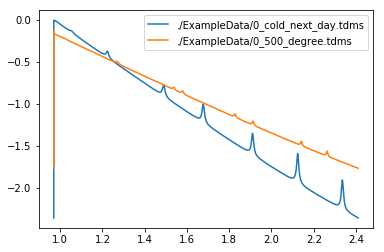

In [8]:
for i in range(0, df_avg.shape[1]):
    plt.plot(df_avg.iloc[i]['average']['x'], df_avg.iloc[i]['average']['y'], 
             label = df_avg.iloc[i]['filename'])
plt.legend()
plt.show()

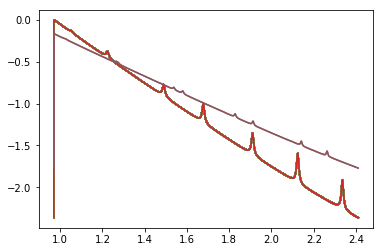

In [5]:
for i in range(0,total_number_of_channels):
    plt.plot(df.iloc[i]['data']['x'], df.iloc[i]['data']['y'])
plt.show()

In [6]:
print(total_number_of_channels)

126


### Load data and preparation

In [18]:
fig=plt.figure(figsize=(8,6))

for filename in dat_files:
    tdms_file = TdmsFile(filename)
    nsp=tdms_file.object().property("Sampling_Points")
    nr=tdms_file.object().property("No_of_Repetitions")

    print(tdms_file.object().properties)
    
    print("The following Groups and Channels are available:")
    for group in tdms_file.groups():
        print(group)
    for channel in tdms_file.group_channels(group):
        print(channel)

    s1 = pd.Series(tdms_file.object('Reference', 'Ramp_Output').data)

    channels=[]

    for i in range(nr):
        channelName='Avg_Data_'+str(i)
        s2=pd.Series(tdms_file.object('PD_Signal_0', channelName).data)
        df_data=pd.concat([s1, s2], axis=1)
        df_data.columns = ['x','y']
        channels.append(df_data)
        #plt.plot(df_data['x'], df_data['y'],label='average')
    #plt.show()

    yAverage=np.zeros(nsp)

#Set nrr=1 if only first channel to be considered;
#set nrr=i if average of the first i channels to be considered;
#set nrr=nr for average on all available channels
    nrr=1
    for i in range(nrr):
        yAverage=yAverage+channels[i]['y']
    
    yAverage=np.divide(yAverage,nrr)

    df_data=pd.concat([s1, pd.Series(yAverage)], axis=1)
    df_data.columns = ['x','y']
    plt.plot(df_data['x'], df_data['y'],label=filename)

    
#plt.xlim(1.0,2.45)
#plt.ylim(-3.75,-0.0)
#legend inside the plot:
#plt.legend(loc='upper right')

#legend outside the plot:
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel("Laser Sweep (V)")
plt.ylabel("Photodiode Signal (V)")
plt.show()

OrderedDict([('name', '0_500_degree'), ('Author', 'tazr'), ('Name', ''), ('Description', 'R_TEC = 6.750 kOhm, Verstärkung = 1E5'), ('Title', ''), ('Ramp_Frequency', 33.0), ('Step_Delay', 1.0), ('Sampling_Points', 5000), ('Oversampling', 500), ('No_of_Steps', 1), ('No_of_Repetitions', 2), ('Data_Structure', 0)])
The following Groups and Channels are available:
Reference
PD_Signal_0
<TdmsObject with path /'PD_Signal_0'/'Avg_Data_20190404 15:30:45.93'>
<TdmsObject with path /'PD_Signal_0'/'Avg_Data_20190404 15:31:01.14'>


KeyError: "Invalid object path: /'PD_Signal_0'/'Avg_Data_0'"

<Figure size 576x432 with 0 Axes>

In [7]:
fig.savefig('Raw_data_heating.pdf', format='pdf', dpi=300,bbox_inches='tight')